Getting Kaggle api

In [1]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
#! mkdir ~/.kaggle/

In [ ]:
#!cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

# Downloading Dataset

In [6]:
! kaggle datasets download uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip sms-spam-collection-dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\sarve\Desktop\spam\spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5129,ham,"Rose for red,red for blood,blood for heart,hea...",NaN,NaN,NaN
401,ham,Dear how is chechi. Did you talk to her,NaN,NaN,NaN
4493,ham,Man this bus is so so so slow. I think you're ...,NaN,NaN,NaN
2860,ham,I am not at all happy with what you saying or ...,NaN,NaN,NaN
4115,ham,What you doing?how are you?,NaN,NaN,NaN


In [11]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [12]:
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)
df.sample(5)

,label,text
4816,ham,Me too. Mark is taking forever to pick up my p...
1656,ham,Yes I posted a couple of pics on fb. There's s...
3548,ham,"I got like $ &lt;#&gt; , I can get some more l..."
3920,ham,Do 1 thing! Change that sentence into: \Becaus...
938,spam,Urgent! call 09061749602 from Landline. Your c...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [14]:
df.drop_duplicates(keep='first', inplace=True)

<Axes: xlabel='charCnt', ylabel='Count'>

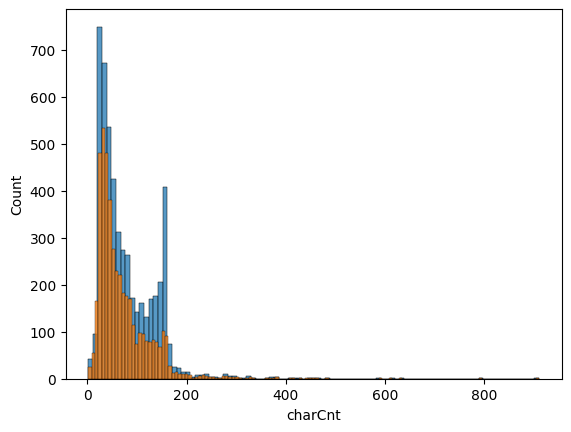

In [15]:
import seaborn as sns
df['charCnt'] = df['text'].apply(len)
sns.histplot(df['charCnt'])
sns.histplot(df[df['label'] == 0]['charCnt'])

<Axes: ylabel='label'>

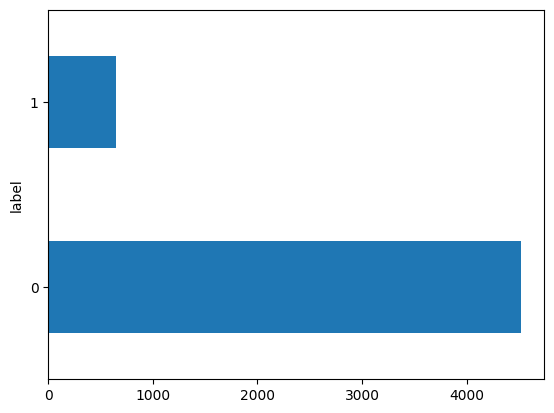

In [16]:
df.label.value_counts().plot(kind = 'barh')

In [17]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

<Axes: xlabel='wordCnt', ylabel='Count'>

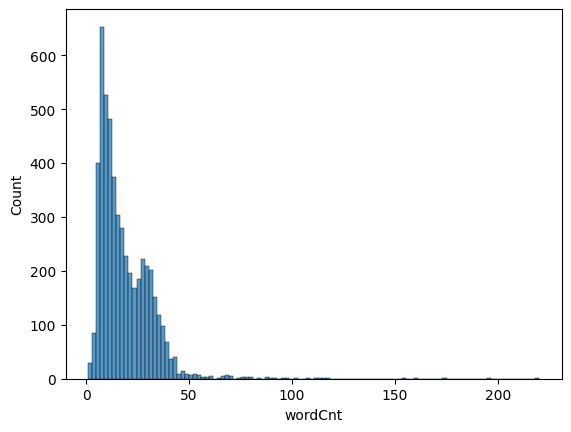

In [18]:
#no of words
df['wordCnt'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
sns.histplot(df['wordCnt'])

<Axes: >

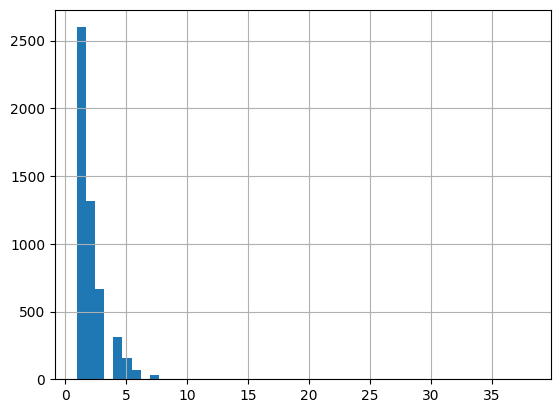

In [19]:
#no of sentences
df['sentCnt'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sentCnt.hist(bins = 50, histtype = 'barstacked')

<Axes: xlabel='charCnt', ylabel='Count'>

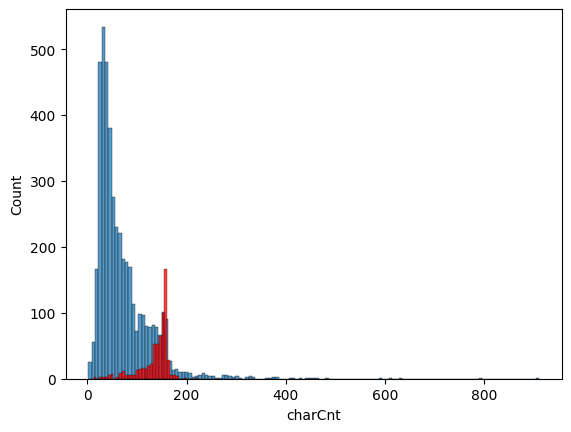

In [20]:
sns.histplot(df[df['label'] == 0]['charCnt'])
sns.histplot(df[df['label'] == 1]['charCnt'], color = 'red')

In [21]:
df.sample(5)

,label,text,charCnt,wordCnt,sentCnt
3889,1,Double Mins & 1000 txts on Orange tariffs. Lat...,151,25,3
4059,1,This weeks SavaMob member offers are now acces...,159,31,5
5453,0,Except theres a chick with huge boobs.,38,8,1
1240,0,Oh yes I can speak txt 2 u no! Hmm. Did u get ...,53,17,3
3116,0,Now am free call me pa.,23,7,1


In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [23]:
#Padding and vectorization, and array

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 30000)
tokenizer.fit_on_texts(df['text'])
tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df['text'])
max_word = np.max(df['wordCnt'])
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen = max_word, padding = 'post')
text = np.array(padded)
text.shape

(5169, 220)

In [24]:
label = df['label']
text_train, text_test, label_train, label_test = train_test_split(text, label, train_size = 0.7, shuffle = True, random_state=1)

In [25]:
text_train

array([[1502,  142, 1113, ...,    0,    0,    0],
       [  45,    9,   13, ...,    0,    0,    0],
       [  16,    3, 6839, ...,    0,    0,    0],
       ...,
       [  45,  114,   12, ...,    0,    0,    0],
       [   6, 4231,   16, ...,    0,    0,    0],
       [ 180,   76,  476, ...,    0,    0,    0]], dtype=int32)

# TF Model

In [26]:

inputs = tf.keras.Input(shape = (max_word,))
embedding = tf.keras.layers.Embedding(
    input_dim = 30000,
    output_dim = 64,
   )(inputs)

flatten = tf.keras.layers.Flatten()(embedding)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(flatten)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy',
    tf.keras.metrics.AUC(name = 'auc')]
)

print(model.summary())


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 220, 64)             │       1,920,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14080)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          14,081 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,934,081 (7.38 MB)

 Trainable params: 1,934,081 (7.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
history = model.fit(
    text_train,
    label_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8625 - auc: 0.6832 - loss: 0.3673 - val_accuracy: 0.9378 - val_auc: 0.9628 - val_loss: 0.1944
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9700 - auc: 0.9786 - loss: 0.1129 - val_accuracy: 0.9848 - val_auc: 0.9909 - val_loss: 0.0687
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9890 - auc: 0.9954 - loss: 0.0482 - val_accuracy: 0.9848 - val_auc: 0.9946 - val_loss: 0.0541
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9932 - auc: 0.9992 - loss: 0.0285 - val_accuracy: 0.9848 - val_auc: 0.9957 - val_loss: 0.0485
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9931 - auc: 0.9996 - loss: 0.0219 - val_accuracy: 0.9848 - val_auc: 0.9964 - val_loss: 0.0451
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9973 - auc: 1.0000 - loss: 0.0106 - val_accuracy: 0.9862 - val_auc: 0.9962 - val_loss: 0.0444
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2

# Model Accuracy

Text(0.5, 1.0, 'Accuracy')

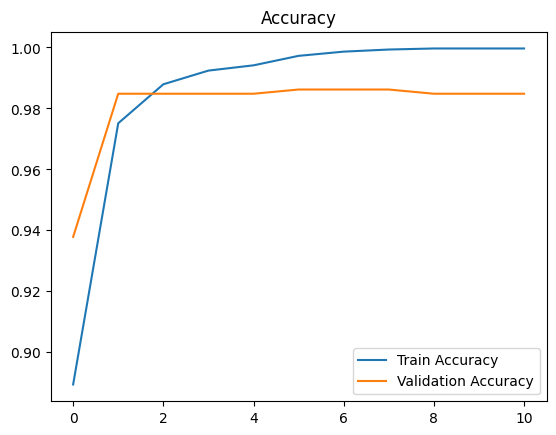

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')


# Model Loss

Text(0.5, 1.0, 'Loss')

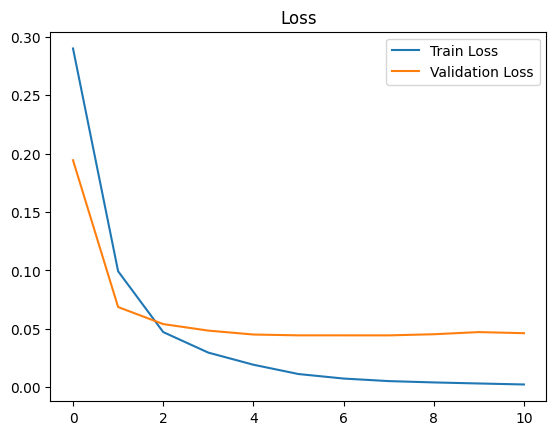

In [29]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Model Evaluation on Testing Data

In [30]:
results = model.evaluate(text_test, label_test, verbose = 0)
print("Test Loss: ", (results[0]))
print("Test Accuracy: ", results[1])


Test Loss:  0.05658964812755585
Test Accuracy:  0.981947124004364


In [31]:
#model.save('/content/drive/MyDrive/ColabNotebooks/Spam_Detection/1.h5')

In [32]:
def text_processing(text):
  sequences = tokenizer.texts_to_sequences(text)
  padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen = 220, padding = 'post')
  return np.array(padded)

In [48]:
test = text_processing(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's" 
                        "apply 08452810075over18's"])
test

array([[  53,  537,    8,   20,    4, 1016,  934,    2,  220, 2713, 1365,
         706, 2714, 2715,  267, 2716,   70, 2713,    2, 2717,    2,  359,
         537,  604, 1205,   82,  436,  185, 4015,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [34]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [35]:
text[2]

array([  53,  537,    8,   20,    4, 1016,  934,    2,  220, 2713, 1365,
        706, 2714, 2715,  267, 2716,   70, 2713,    2, 2717,    2,  359,
        537,  604, 1205,   82,  436,  185,  707,  437, 4015,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [51]:
model.predict(text[2].reshape(1, -1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.9999544]], dtype=float32)

In [49]:
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.999945]], dtype=float32)

# Saving Tokenizer as JSON File

In [42]:
import json

# Convert tokenizer to JSON
tokenizer_json = tokenizer.to_json()

In [ ]:
#saving json tokenizer to file
with open(r"C:\Users\sarve\Desktop\spam\tokenizer.txt", "w") as outfile:
    json.dump(tokenizer_json, outfile)

# Code to load tokenizer

In [ ]:
"""# Load JSON from the directory
with open(r'C:\Users\sarve\Desktop\spam\tokenizer.txt', "r") as infile:
    loaded_tokenizer_json = json.load(infile)

# Reconstruct tokenizer
loaded_tokenizer = Tokenizer.from_json(loaded_tokenizer_json)
"""